### Описание атрибутов датасета:
В выбранном датасете представлены два атрибута:
- **Год**: представляет собой год, к которому относится пропорция добавленной стоимости. Тип данных - числовой.
- **Пропорция**: представляет собой значение пропорции добавленной стоимости от высокотехнологичной и средней промышленности к общей добавленной стоимости. Тип данных - числовой.
  
Добавим новые атрибуты на основе предыдущих: **среднегодовую пропорцию** и **изменение пропорции по сравнению с предыдущим годом**.

In [8]:
import pandas as pd

data = {
    'Year': [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'Proportion': [28.4, 28.1, 21, 28.9, 27.8, 25.6, 26.4, 27.2, 28.1, 27.8, 27.2, 26, 24.7, 23.9, 24.7, 24.5, 25.1, 26.5, 26.2, 28, 27.8, 28.3, 29.4, 30.9, 30.7, 28.2]
}

df = pd.DataFrame(data)

# Добавление нового атрибута со среднегодовой пропорцией
df['Average_Proportion'] = df['Proportion'].mean()

# Добавление нового атрибута с изменением пропорции по сравнению с предыдущим годом
df['Change_from_Prev_Year'] = df['Proportion'].diff()

print(df)

    Year  Proportion  Average_Proportion  Change_from_Prev_Year
0   1990        28.4           26.976923                    NaN
1   1991        28.1           26.976923                   -0.3
2   1992        21.0           26.976923                   -7.1
3   1993        28.9           26.976923                    7.9
4   1994        27.8           26.976923                   -1.1
5   1995        25.6           26.976923                   -2.2
6   1996        26.4           26.976923                    0.8
7   1997        27.2           26.976923                    0.8
8   1998        28.1           26.976923                    0.9
9   1999        27.8           26.976923                   -0.3
10  2000        27.2           26.976923                   -0.6
11  2001        26.0           26.976923                   -1.2
12  2002        24.7           26.976923                   -1.3
13  2003        23.9           26.976923                   -0.8
14  2004        24.7           26.976923

В данном случае, у нас нет выбросов и пропущенных значений, поэтому мы можем перейти к построению графиков для анализа кластеров.

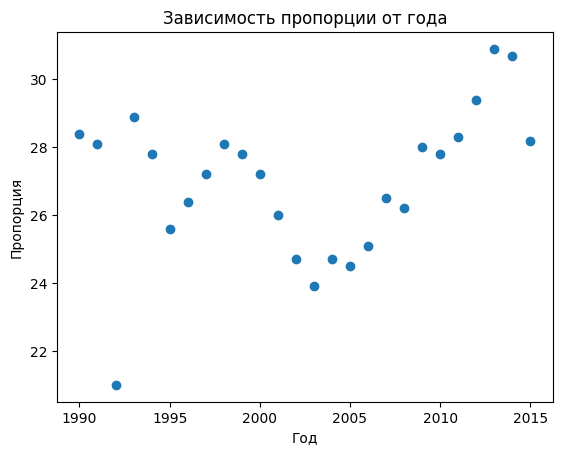

In [9]:
import matplotlib.pyplot as plt

# График зависимости пропорции от года
plt.scatter(df['Year'], df['Proportion'])
plt.title('Зависимость пропорции от года')
plt.xlabel('Год')
plt.ylabel('Пропорция')
plt.show()

На графике мы можем увидеть, что данные можно разделить на три основные группы: **низкие значения пропорции в начале периода, изменчивый период в середине и более стабильные значения в конце периода.**

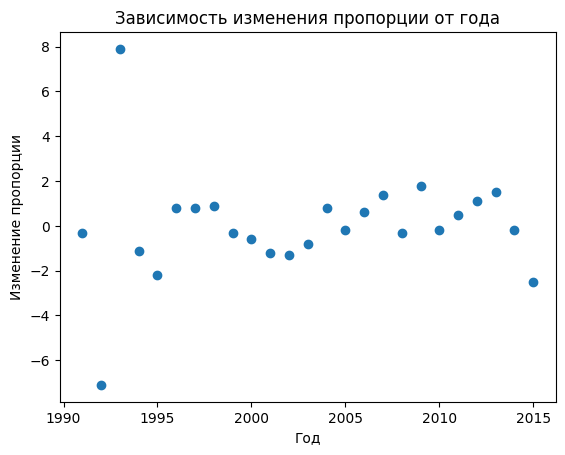

In [10]:
# График зависимости изменения пропорции от года
plt.scatter(df['Year'], df['Change_from_Prev_Year'])
plt.title('Зависимость изменения пропорции от года')
plt.xlabel('Год')
plt.ylabel('Изменение пропорции')
plt.show()

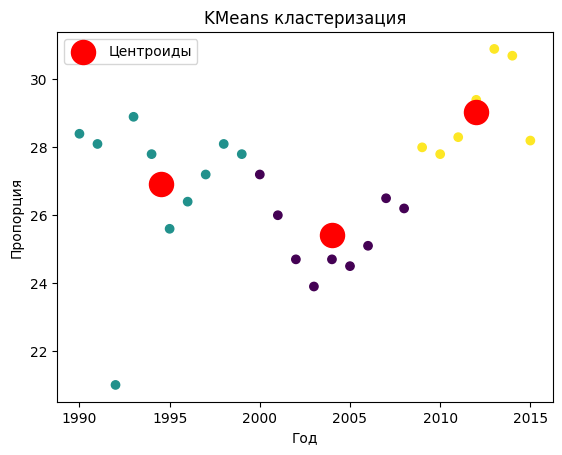

In [11]:
from sklearn.cluster import KMeans
import numpy as np

# Подготовка данных для кластеризации
X = np.array(df[['Year', 'Proportion']])

# Создание модели KMeans с явным указанием значения n_init
kmeans = KMeans(n_clusters=3, n_init=10, random_state=0)
kmeans.fit(X)

# Получение меток кластеров для каждой точки данных
labels = kmeans.labels_

# Визуализация результатов кластеризации
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Центроиды')
plt.title('KMeans кластеризация')
plt.xlabel('Год')
plt.ylabel('Пропорция')
plt.legend()
plt.show()

Мы получили график, на котором отображены точки данных в соответствии с их кластерами, а также центроиды кластеров.

## Выводы:

1. Метод KMeans позволяет эффективно кластеризовать данные, выделяя группы схожих точек внутри датасета.
2. В данном случае, применение KMeans позволило нам выделить три основные группы точек данных, которые соответствуют трем различным кластерам. Изменение пропорции было добавлено в анализ и позволило выявить тенденции и динамику изменений в пропорции в течение времени.
3. Кластеризация помогает визуализировать структуру данных, что позволяет лучше понять их характеристики.
4. Результаты кластеризации могут быть использованы для принятия решений, анализа тенденций и выявления закономерностей в данных.

*Таким образом, применение метода KMeans к датасету "High-tech and medium industry" помогло выявить важные группы данных и позволило провести более детальный анализ динамики пропорции в различные периоды времени, а также получить лучшее понимание их структуры.*